['Trigger']
(1, 1)
Creating RawArray with float64 data, n_channels=1, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


C:\Users\pierrecu\neuramod\lib\site-packages\mne\viz\_figure.py:1932: RuntimeWarning: Mean of empty slice.
  data -= data.mean(axis=1, keepdims=True)
C:\Users\pierrecu\neuramod\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


ValueError: zero-size array to reduction operation maximum which has no identity

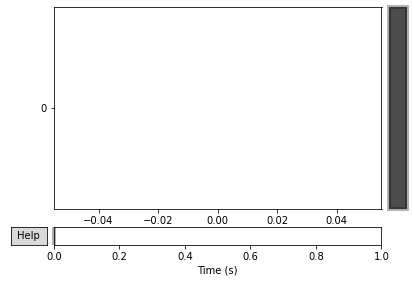

In [30]:
import os.path as op

import pyxdf

import mne
#from mne.datasets import misc

#fname = op.join(misc.data_path(), 'xdf','sub-P001_ses-S001_task-Default_run-001_beh.xdf')
fname = 'sub-P001_ses-S001_task-Default_run-001_beh.xdf'

id = 4
streams, header = pyxdf.load_xdf(fname)
#print(streams)
data = streams[id]["time_series"].T
print(streams[id]["info"]["name"])
print(data.shape)

#assert data.shape[0] == 3  # four raw EEG plus one stim channel
#data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
#data = data[::2]  # subselect
#data *= 1e-6#(1e-6 / 50 / 2)  # uV -> V and preamp gain
#sfreq = float(streams[id]["info"]["nominal_srate"][0])
info = mne.create_info(data.shape[0], 1, ["stim" for x in range(data.shape[0])])
raw = mne.io.RawArray(data, info)
raw.plot(scalings=dict(eeg=100e-6))